### Рефлексија

1. (1.23) Точкест звучен извор зрачи во слободен простор. Одалечен е 14,2 cm од бескончено голем ѕид кој врши апсолутна рефлексија. Да се најде притисокот на 3 m од изворот ако $f$ е 400 Hz, $P_a$ е 1,6 mW.

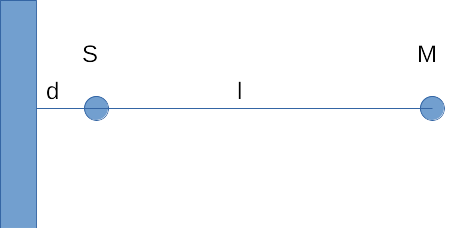

In [8]:
import numpy as np

f = 400  # Hz
Pa = 1.6e-3  # W
d = 0.142  # m
l = 3  # m
alpha = 0  # totalna refleksija

rhoc = 414  # Kg/sm2
c = 343  # m/s

$ p_M = p_S + p_r $  - сума од директен и рефлектиран бран

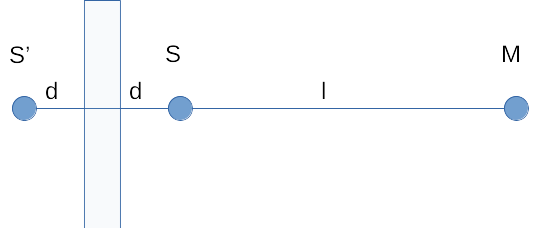

- 1. чекор - пресметка на магнитудите

$ p = \sqrt{\frac{(1 - \alpha) P_a \rho c}{4 \pi r^2}} $

$ \alpha $ - коефициент на апсорпција на моќност

In [11]:
p_S = np.sqrt(Pa * rhoc / (4*np.pi * l**2))  # Pa
print('p_S', p_S, 'Pa')

r = l + 2*d  # patot kojsto treba da go pomine reflektiraniot bran
p_r = np.sqrt((1 - alpha) * Pa * rhoc / (4*np.pi * r**2))
print('p_r', p_r, 'Pa')

p_S 0.07653039857325812 Pa
p_r 0.06991205716192886 Pa


- 2. Чекор - фазна разлика помеѓу пристигнатите бранови

$\Delta \varphi = k \cdot \Delta r = \frac{2\pi}{\lambda} (r - l) $

In [12]:
lamda = c / f  # m
print('lamda', lamda)

phi = 2 * np.pi / lamda * (r - l)  # rad
print('phi', phi)
print('phi', phi/np.pi*180, 'o')


lamda 0.8575
phi 2.0809616644186604
phi 119.23032069970837 o


- 3. Чекор - фазорско собирање

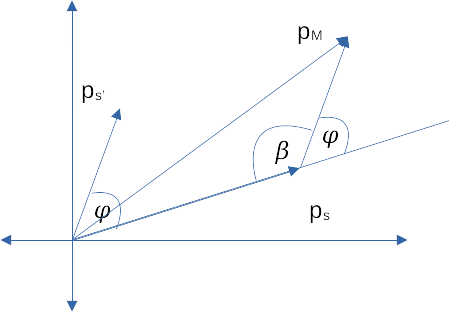

$ p_M^2 = p_S^2 + p_{S'}^2 - 2p_S p_{S'} \cos \beta$

$\beta = \pi - \varphi \rightarrow \cos \beta = - \cos \varphi$

$ p_M^2 = p_S^2 + p_{S'}^2 + 2p_S p_{S'} \cos \varphi$


In [16]:
p_M = np.sqrt(p_S**2 + p_r**2 + 2*p_S*p_r* np.cos(phi))
print('p_M', p_M, 'Pa')
print(f'p_M = {p_M*1000:.2f} mPa')

p_M 0.07429110899626483 Pa
p_M = 74.29 mPa


2. (кол. 1.) Звучен извор се наоѓа помеѓу два бесконечни ѕида, емитува звук со $f$ и $P_a$. Да се пресмета $p_M$ ако се земе во обзир само првата рефлексија од ѕидовите.

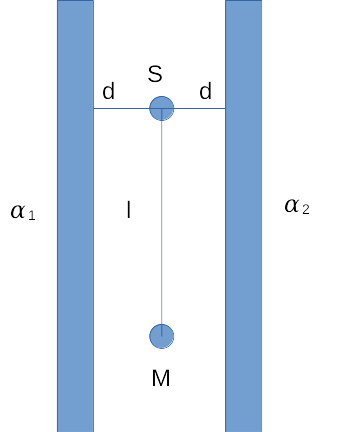

In [18]:
Pa = 1e-3  # W
f = 500  # Hz
alpha_1 = 0.5  
alpha_2 = 0.3

c = 343  # m/s
lamda = c / f  # m
print('lamda', lamda)
rhoc = 414  # Kg/sm2

l = 3/2 * lamda
d = 1/2 * lamda

lamda 0.686


$p_M = p_S + p_{r1} + p_{r2}$

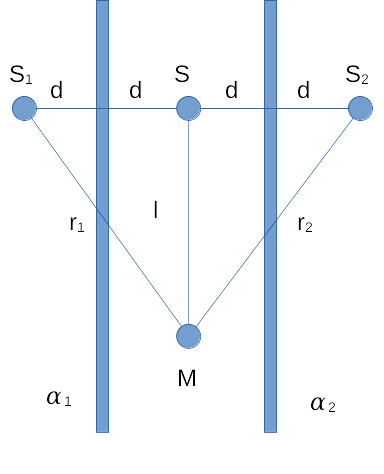

од системот $ \rightarrow r_1 = r_2 \rightarrow p_{S1}$ и $p_{S2}$ се во фаза! ($\varphi = 0$)

$p_{S12} = p_{S1} + p_{S2}$

$ p_M = p_S + p_{S12}$

- 1. Чекор

In [19]:
p_S = np.sqrt(Pa * rhoc / (4 * np.pi * l**2))
print(p_S)

r_1 = np.sqrt(l**2 + (2*d)**2)
p_S1 = np.sqrt((1 - alpha_1) * Pa * rhoc / (4 * np.pi * r_1**2))
print(p_S1)
p_S2 = np.sqrt((1 - alpha_2) * Pa * rhoc / (4 * np.pi * r_1**2))
print(p_S2)


0.17639239776384558
0.10378018595160797
0.12279437199892533


- 2. Чекор

In [20]:
phi = 2*np.pi / lamda * (r_1 - l)
print(phi)
print(phi * 180 / np.pi)

1.9023954383695971
108.99922958351802


- 3. Чекор

In [23]:
p_S12 = p_S1 + p_S2
p_M = np.sqrt(p_S**2 + p_S12**2 + 2*p_S*p_S12 * np.cos(phi))
print(p_M)

0.23754576732442445


(1.28) Два ненасочени звучници се поставени во слободен простор до ѕид со коефициент на апсорпција $\alpha = 0$. Да се најде импулсниот одѕив во точката $M$ ако најгласниот звук се земе со ниво 0 dB.

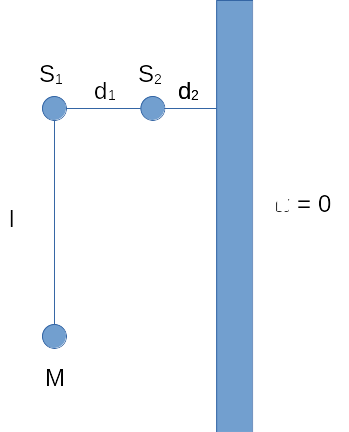

Имаме четири звучни бранови - од $S_1$ и $S_2$ и нивните рефлексии.

$p_M = p_{S1} + p_{S2} + p_{r1} + p_{r2} $

$J_{S1} = \frac{P_a}{4\pi r_{S1}^2}$


$L = 10 \log \frac{J_{S1}}{J_0}$ каде што $J_0$ е праг на чујност, овде $J_{S1}$ е земено за референтно $\rightarrow L_{S1} = 0$ dB.

задоцнувања на импулсите ќе бидат $t = \frac{l}{c}$

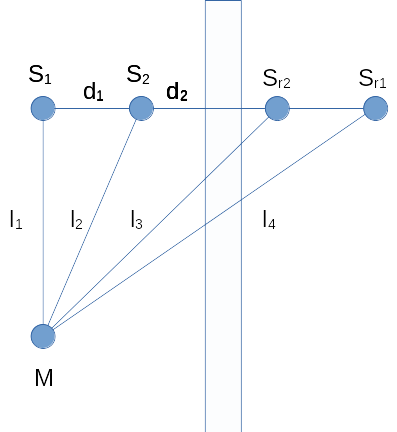


In [2]:
import numpy as np
c = 343  # m/s
l = 20  # m
d1 = 10  # m
d2 = 5  # m

t1 = l / c  # s
l2 = np.sqrt(d1**2 + l**2)
t2 = l2 / c
l3 = np.sqrt((d1 + d2 + d2)**2 + l**2) 
t3 = l3 / c
l4 = np.sqrt((2*d1 + 2*d2)**2 + l**2)
t4 = l4 / c

print(t1, t2, t3, t4)

0.05830903790087463 0.06519148622448367 0.08246143220834373 0.10511811298728832


$L_{S2} = 10 \log \frac{J_{S2}}{J_{S1}} = 10 \log \frac{\frac{P_a}{4\pi r_{S2}^2}}{\frac{P_a}{4\pi r_{S1}^2}}$

$ L_{S2} = 20 \log \frac{r_{S1}}{r_{S2}}$

In [3]:
L1 = 0  # dB
L2 = 20 * np.log10(l / l2)
L3 = 20 * np.log10(l / l3)
L4 = 20 * np.log10(l / l4)
print(L1, L2, L3, L4)

0 -0.9691001300805644 -3.0102999566398125 -5.1188336097887435


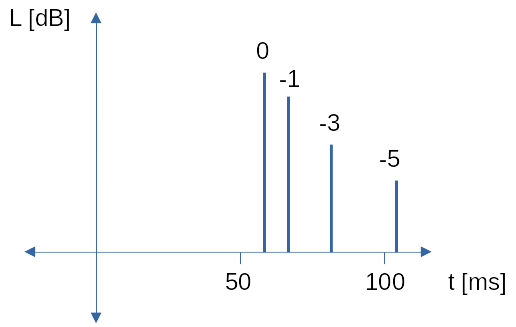

Text(0, 0.5, 'L [dB]')

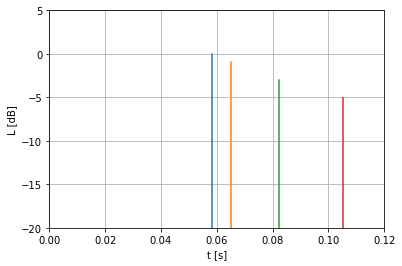

In [9]:
from matplotlib import pyplot as plt

plt.plot([t1, t1], [-20, L1])
plt.plot([t2, t2], [-20, L2])
plt.plot([t3, t3], [-20, L3])
plt.plot([t4, t4], [-20, L4])
plt.axis([0, 0.120, -20, 5])
plt.grid()
plt.xlabel('t [s]')
plt.ylabel('L [dB]')

(1.33) Една сирена емитува звук со две компоненти на 1000 Hz и на 4000 Hz. На растпјание од 1,5 km е измерен звук со ниво од 80 dB. Да се пресмета нивото на 1 m ако дисипацијата на 1000 Hz изнесува 0,5 dB на 100 m, а на 4000 Hz таа е 3 dB на 100 m.

$ \Delta L = 20 \log \frac{r}{r_0} + 4,34 m (r - r_0)$


In [15]:
r = 1500  # m
r0 = 1  # m
# m1 = 0.5  # dB/100m
m1 = 0.5/100  # dB/m
m2 = 3/100  # dB/m

D_r1 = 20*np.log10(r / r0)
D_m1 = m1 * (r - r0)
D_1 = D_r1 + D_m1
print(D_1, D_r1, D_m1)

71.01682518111363 63.52182518111363 7.495


In [16]:
D_r2 = 20*np.log10(r / r0)
D_m2 = m2 * (r - r0)
D_2 = D_r2 + D_m2
print(D_2, D_r2, D_m2)

108.49182518111363 63.52182518111363 44.97
